<class 'numpy.ndarray'>


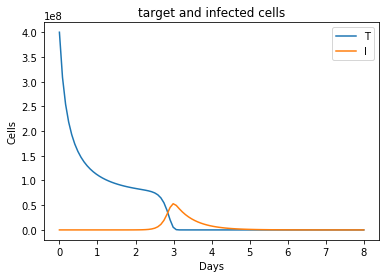

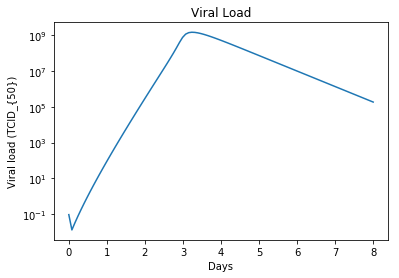

In [226]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
pV = 210; 
beta = 5e-7; 
betap = 3e-8;
V0 = 1e+4; 
I0 = 0
T0 = 7e+7; 
gT = 0.8;
deltaV = 5; 
deltaI = 2;

time = np.linspace(0,8,100)
y_init = [4e+8, 0, 9.3e-2]

# TIV differential equations
def TIV(t, y): 
    T,I,V = y
    return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
            betap * T * V - (deltaI * I), 
            pV * I - (deltaV * V) - (beta * V * T)]

# Solve TIV
sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)

# Plot
fig1, ax1 = plt.subplots()
ax1.plot(sol.t,sol.y[0],sol.t,sol.y[1])
ax1.set_title("target and infected cells")
ax1.set_xlabel("Days")
ax1.set_ylabel("Cells")
ax1.legend(('T','I'))

fig2, ax2 = plt.subplots()
ax2.plot(sol.t,sol.y[2])
ax2.set_title('Viral Load')
ax2.set_xlabel("Days")
ax2.set_ylabel("Viral load (TCID_{50})")
ax2.set_yscale('log')

plt.show()

1e-07
2.3333333333333333e-07
3.6666666666666667e-07
5e-07


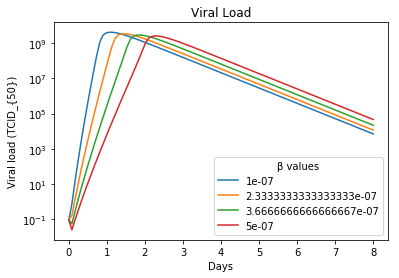

'\nCurve shifts right with increased target cell consumption of virus. \nTime to reach Vmax prolonged -- Because initialy less free viral particles? But that would be represented by initial sharp decrease\nProlonged duration of infection -- As overall increase in virus production?\n'

In [215]:
''' 
Varying beta values (rate of viral consumption by binding to target cells) 
e.g. If viral entry enhanced
'''

# Varying beta values
beta_values = np.linspace(1e-7, 5e-7, 4)
time = np.linspace(0,8,100)

# beta_sltns = [beta, x, y]
beta_sltns = []

for i in beta_values:
    beta = i
    # Solve TIV
    sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
    
    # Storing values
    beta_sltn = (beta, sol.t, sol.y[2])   
    beta_sltns.append(beta_sltn)

# Plotting viral load for dif beta values
# Create plot
fig3, ax3 = plt.subplots()
legend = []

for i in beta_sltns:
    print (i[0])
    legend.append(i[0])
    x = i[1]
    y = i[2]
    ax3.plot(x, y)
    
ax3.set_title('Viral Load')
ax3.set_xlabel("Days")
ax3.set_ylabel("Viral load (TCID_{50})")
ax3.set_yscale('log')
ax3.legend((legend), title = '\u03B2 values')

plt.show()

'''
Curve shifts right with increased target cell consumption of virus. 
Time to reach Vmax prolonged -- Because initialy less free viral particles? 
But that would be represented by initial sharp decrease

Prolonged duration of infection -- As overall increase in virus production?
'''

4117279424.281879
3380141733.006975
2876611169.092
2533550964.0795965


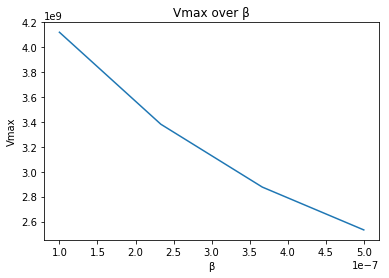

'\nDecreasing Vmax as increased target cell consumption of virus. \nLess free viral particles since enhanced entry (though possibly more virus -- can check infected cell population.\n'

In [268]:
'''Extract Vmax'''

# Create storage for Vmax values
Vmax_beta = []

# Extract Vmax and store in Vmax_vals as (beta, Vmax)
for i in beta_sltns:
    beta = i[0]
    Vmax = np.amax(i[2])
    Vmax_beta.append((beta, Vmax))
    
# Plot Vmax against beta

fig3, ax4 = plt.subplots()
x = []
y = []
for i in Vmax_beta:   
    x.append(i[0])
    y.append(i[1])

ax4.plot(x, y)

ax4.set_title('Vmax over \u03B2')
ax4.set_xlabel('\u03B2')
ax4.set_ylabel('Vmax')
plt.show()

'''
Decreasing Vmax as increased target cell consumption of virus. 
Less free viral particles since enhanced entry (though possibly more virus -- can check infected cell population.
'''

75.0
187.5
300.0


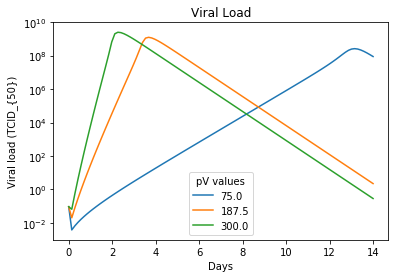

In [270]:
''' 
Varying pV values (viral production rate)
e.g. Increased viral translation/replication/budding
'''

pV_values = np.linspace(75, 300, 3)
time = np.linspace(0,14,100)

# pV_sltns is list in which each item = [pV parameter, x values (time), y values (viral load)]
pV_sltns = []

for i in pV_values:
    pV = i
    # Solve TIV
    sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
    
    # Storing values in pV_sltn
    pV_sltn = (pV, sol.t, sol.y[2])   
    pV_sltns.append(pV_sltn)  

    
# Plotting viral load for dif beta values
# Create plot
fig5, ax5 = plt.subplots()
legend = []

for i in pV_sltns:
    print (i[0])
    legend.append(i[0])
    x = i[1]
    y = i[2]
    ax5.plot(x, y)
    
ax5.set_title('Viral Load')
ax5.set_xlabel("Days")
ax5.set_ylabel("Viral load (TCID_{50})")
ax5.set_yscale('log')
ax5.legend((legend), title = 'pV values')

plt.show()


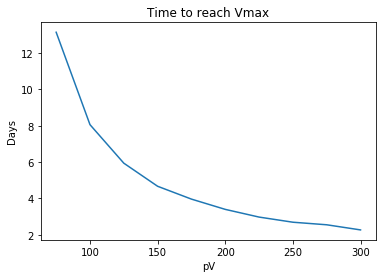

In [280]:
'''Extract Vmax coordinates and plot time'''
pV_values = np.linspace(75, 300, 10)
time = np.linspace(0,14,100)

# pV_sltns is list in which each item = [pV parameter, x values (time), y values (viral load)]
pV_sltns = []

for i in pV_values:
    pV = i
    # Solve TIV
    sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
    
    # Storing values in pV_sltn
    pV_sltn = (pV, sol.t, sol.y[2])   
    pV_sltns.append(pV_sltn)  
    
# Create storage for Vmax values
Vmax_pV = []

# Extract Vmax and store in Vmax_vals as (beta, Vmax)
for i in pV_sltns:
    pV = i[0]
    Vmax_x = np.amax(i[2])
    index = np.argmax(i[2]) # of Vmax_x
    Vmax_y = i[1][index]
    Vmax_pV.append((pV, Vmax_x, Vmax_y))

# Plot time to reach Vmax (Vmax_y) against pV

fig6, ax6 = plt.subplots()
x = [] # pV
y = [] # time to reach Vmax (Vmax_y)
for i in Vmax_pV:   
    x.append(i[0])
    y.append(i[2])

ax6.plot(x, y)

ax6.set_title('Time to reach Vmax')
ax6.set_xlabel('pV')
ax6.set_ylabel('Days')
plt.show()

'''
Vmax reached exponentially faster as viral production rate increases
'''

In [ ]:
# Surface plot, extract data